In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [7]:
data = pd.read_csv('credit_card_approval.csv')
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Higher education,Married,House / apartment,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
3,5009749,F,Y,N,0,NaN,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,5028645,F,N,Y,0,NaN,Higher education,Married,House / apartment,-2182,1,0,0,0,2,0
1537,5023655,F,N,N,0,225000.0,Incomplete higher,Single / not married,House / apartment,-1209,1,0,0,0,1,0
1538,5115992,M,Y,Y,2,180000.0,Higher education,Married,House / apartment,-2477,1,0,0,0,4,0
1539,5118219,M,Y,N,0,270000.0,Secondary / secondary special,Civil marriage,House / apartment,-645,1,1,1,0,2,0


<Axes: xlabel='label'>

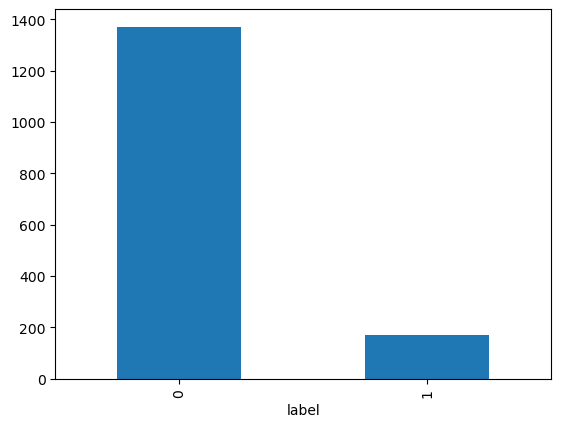

In [11]:
data.label.value_counts().plot.bar()

In [13]:
data.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
EDUCATION          0
Marital_status     0
Housing_type       0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Family_Members     0
label              0
dtype: int64

<Axes: >

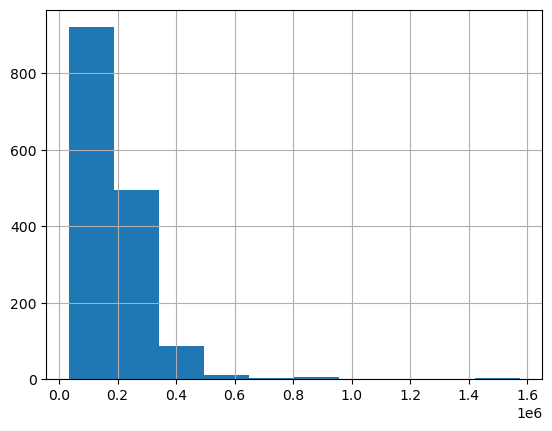

In [15]:
data['Annual_income'].hist()

In [17]:
imputer = IterativeImputer()
data[['Annual_income', 'Employed_days']] = imputer.fit_transform(data[['Annual_income', 'Employed_days']])

In [19]:
data.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
EDUCATION         0
Marital_status    0
Housing_type      0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [21]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.000000,Higher education,Married,House / apartment,365243.0,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.000000,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.000000,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
3,5009749,F,Y,N,0,198382.220589,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.000000,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,5028645,F,N,Y,0,198584.161154,Higher education,Married,House / apartment,-2182.0,1,0,0,0,2,0
1537,5023655,F,N,N,0,225000.000000,Incomplete higher,Single / not married,House / apartment,-1209.0,1,0,0,0,1,0
1538,5115992,M,Y,Y,2,180000.000000,Higher education,Married,House / apartment,-2477.0,1,0,0,0,4,0
1539,5118219,M,Y,N,0,270000.000000,Secondary / secondary special,Civil marriage,House / apartment,-645.0,1,1,1,0,2,0


In [23]:
data.GENDER.value_counts()

GENDER
F    973
M    568
Name: count, dtype: int64

In [91]:
labelEncoder = LabelEncoder()
data['GENDER'] = labelEncoder.fit_transform(data.GENDER)
data['Car_Owner'] = labelEncoder.fit_transform(data.Car_Owner)
data['Propert_Owner'] = labelEncoder.fit_transform(data.Propert_Owner)
# education_encoding = {
#     "Lower secondary": 0,
#     "Secondary / secondary special": 1,
#     "Incomplete higher": 2,  
#     "Higher education": 3,
#     "Academic degree": 4,
# }
# def encode_education(education):
#     return education_encoding[education]
# data['EDUCATION'] = data['EDUCATION'].apply(encode_education)
# data
data['EDUCATION'] = labelEncoder.fit_transform(data.EDUCATION)
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,1,1,1,0,180000.000000,1,Married,House / apartment,365243.0,1,0,0,0,2,1
1,5009744,0,1,0,0,315000.000000,1,Married,House / apartment,-586.0,1,1,1,0,2,1
2,5009746,0,1,0,0,315000.000000,1,Married,House / apartment,-586.0,1,1,1,0,2,1
3,5009749,0,1,0,0,198382.220589,1,Married,House / apartment,-586.0,1,1,1,0,2,1
4,5009752,0,1,0,0,315000.000000,1,Married,House / apartment,-586.0,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,5028645,0,0,1,0,198584.161154,1,Married,House / apartment,-2182.0,1,0,0,0,2,0
1537,5023655,0,0,0,0,225000.000000,2,Single / not married,House / apartment,-1209.0,1,0,0,0,1,0
1538,5115992,1,1,1,2,180000.000000,1,Married,House / apartment,-2477.0,1,0,0,0,4,0
1539,5118219,1,1,0,0,270000.000000,4,Civil marriage,House / apartment,-645.0,1,1,1,0,2,0


In [93]:
enc_data = pd.get_dummies(data[['Marital_status', 'Housing_type']])
data = pd.concat([data, enc_data], axis=1)
data.drop(columns=["Marital_status","Housing_type"])

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Employed_days,Mobile_phone,Work_Phone,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
0,5008827,1,1,1,0,180000.000000,1,365243.0,1,0,...,True,False,False,False,False,True,False,False,False,False
1,5009744,0,1,0,0,315000.000000,1,-586.0,1,1,...,True,False,False,False,False,True,False,False,False,False
2,5009746,0,1,0,0,315000.000000,1,-586.0,1,1,...,True,False,False,False,False,True,False,False,False,False
3,5009749,0,1,0,0,198382.220589,1,-586.0,1,1,...,True,False,False,False,False,True,False,False,False,False
4,5009752,0,1,0,0,315000.000000,1,-586.0,1,1,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,5028645,0,0,1,0,198584.161154,1,-2182.0,1,0,...,True,False,False,False,False,True,False,False,False,False
1537,5023655,0,0,0,0,225000.000000,2,-1209.0,1,0,...,False,False,True,False,False,True,False,False,False,False
1538,5115992,1,1,1,2,180000.000000,1,-2477.0,1,0,...,True,False,False,False,False,True,False,False,False,False
1539,5118219,1,1,0,0,270000.000000,4,-645.0,1,1,...,False,False,False,False,False,True,False,False,False,False
